This code is developed for testing Xgboost pipeline on classification of Thyroid. The data is public and dowonloaded from "https://www.kaggle.com/datasets/emmanuelfwerr/thyroid-disease-data?resource=download".

The pipeline was developed by the help from "https://github.com/liannewriting/YouTube-videos-public/blob/main/xgboost-python-tutorial-example/xgboost_python.ipynb"

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder


Step #1: Explore and prep data

In [ ]:
df_org = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classifications/Thyroids/thyroidDF.csv')

In [ ]:
df_org

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
df_org.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

In [ ]:
df_org.dtypes

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object

In [111]:
drop_colms = ['patient_id','query_on_thyroxine','TBG','TBG_measured','FTI_measured',
              'TT4_measured','T4U_measured','TSH_measured','T3_measured','T3','referral_source']
df = df_org.drop(drop_colms,axis=1)

In [112]:
df_org['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [113]:
df

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,t,f,f,f,f,f,f,0.3,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.6,128.0,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,NaN,NaN,NaN,-
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,-
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,NaN,NaN,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,t,f,f,f,f,f,NaN,64.0,0.83,77.0,-
9168,22,M,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,91.0,0.92,99.0,-
9169,69,M,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,113.0,1.27,89.0,I
9170,47,F,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,75.0,0.85,88.0,-


In [114]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
       'thyroid_surgery', 'I131_treatment', 'query_hypothyroid',
       'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [115]:
df = df.dropna()

In [116]:
df

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
18,63,F,t,f,t,f,f,f,f,f,f,f,f,f,f,68.00,48.0,1.02,47.0,F
19,36,F,f,f,f,f,f,f,t,t,f,f,f,f,f,1.50,90.0,1.06,85.0,-
21,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.20,104.0,1.08,96.0,-
22,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,5.90,88.0,0.84,105.0,-
23,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,107.0,1.13,95.0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,f,f,f,f,f,0.81,31.0,0.55,56.0,K
9154,16,M,f,f,f,f,f,f,f,f,f,f,f,f,f,2.60,122.0,0.86,142.0,-
9155,54,M,f,f,f,f,f,f,f,f,f,f,f,f,f,1.10,105.0,0.82,128.0,-
9156,78,M,f,f,f,f,f,f,f,f,f,f,f,f,f,0.97,97.0,0.73,133.0,-


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7652 entries, 18 to 9157
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7652 non-null   int64  
 1   sex                  7652 non-null   object 
 2   on_thyroxine         7652 non-null   object 
 3   on_antithyroid_meds  7652 non-null   object 
 4   sick                 7652 non-null   object 
 5   pregnant             7652 non-null   object 
 6   thyroid_surgery      7652 non-null   object 
 7   I131_treatment       7652 non-null   object 
 8   query_hypothyroid    7652 non-null   object 
 9   query_hyperthyroid   7652 non-null   object 
 10  lithium              7652 non-null   object 
 11  goitre               7652 non-null   object 
 12  tumor                7652 non-null   object 
 13  hypopituitary        7652 non-null   object 
 14  psych                7652 non-null   object 
 15  TSH                  7652 non-null   

In [118]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid',
             'B': 'hyperthyroid',
             'C': 'hyperthyroid',
             'D': 'hyperthyroid',
             'E': 'hypothyroid',
             'F': 'hypothyroid',
             'G': 'hypothyroid',
             'H': 'hypothyroid'}

df['target'] = df['target'].map(diagnoses)
df.dropna(subset=['target'], inplace=True)

<ipython-input-118-fa24f93b4c44>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].map(diagnoses)
<ipython-input-118-fa24f93b4c44>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['target'], inplace=True)


In [119]:
df

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
18,63,F,t,f,t,f,f,f,f,f,f,f,f,f,f,68.00,48.0,1.02,47.0,hypothyroid
19,36,F,f,f,f,f,f,f,t,t,f,f,f,f,f,1.50,90.0,1.06,85.0,negative
21,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,1.20,104.0,1.08,96.0,negative
22,40,F,f,f,f,f,f,f,f,f,f,f,f,f,f,5.90,88.0,0.84,105.0,negative
23,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.05,107.0,1.13,95.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,84,F,f,f,f,f,f,f,f,f,f,f,f,f,f,0.34,105.0,0.93,113.0,negative
9152,80,M,f,f,f,f,f,f,f,f,f,f,f,f,f,3.30,111.0,0.92,121.0,negative
9154,16,M,f,f,f,f,f,f,f,f,f,f,f,f,f,2.60,122.0,0.86,142.0,negative
9155,54,M,f,f,f,f,f,f,f,f,f,f,f,f,f,1.10,105.0,0.82,128.0,negative


In [168]:
df['target'].unique()

array(['hypothyroid', 'negative', 'hyperthyroid'], dtype=object)

In [120]:
df.replace('f', 0, inplace=True)
df.replace('t', 1, inplace=True)

df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)

<ipython-input-120-3791108240f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('f', 0, inplace=True)
<ipython-input-120-3791108240f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('t', 1, inplace=True)
<ipython-input-120-3791108240f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('M', 0, inplace=True)
<ipython-input-120-3791108240f1>:5: SettingWithCopyWarning: 
A value is trying to be set on a 

In [121]:
df

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
18,63,1,1,0,1,0,0,0,0,0,0,0,0,0,0,68.00,48.0,1.02,47.0,hypothyroid
19,36,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.50,90.0,1.06,85.0,negative
21,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.20,104.0,1.08,96.0,negative
22,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,5.90,88.0,0.84,105.0,negative
23,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.05,107.0,1.13,95.0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9151,84,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.34,105.0,0.93,113.0,negative
9152,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.30,111.0,0.92,121.0,negative
9154,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.60,122.0,0.86,142.0,negative
9155,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.10,105.0,0.82,128.0,negative


In [122]:
label_encoder = LabelEncoder()

In [123]:
df['target_coded'] = label_encoder.fit_transform(df['target'])

<ipython-input-123-a2e6daf654b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_coded'] = label_encoder.fit_transform(df['target'])


In [169]:
df.head()

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target,target_coded
18,63,1,1,0,1,0,0,0,0,0,...,0,0,0,0,68.00,48.0,1.02,47.0,hypothyroid,1
19,36,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1.50,90.0,1.06,85.0,negative,2
21,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1.20,104.0,1.08,96.0,negative,2
22,40,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5.90,88.0,0.84,105.0,negative,2
23,77,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,107.0,1.13,95.0,negative,2


In [125]:
df['target_coded'].unique()

array([1, 2, 0])

In [126]:
X = df.drop(['target_coded','target'], axis =1)
y=df['target_coded']

In [127]:
y_labl = df['target']

In [128]:
y

18      1
19      2
21      2
22      2
23      2
       ..
9151    2
9152    2
9154    2
9155    2
9156    2
Name: target_coded, Length: 6243, dtype: int64

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Step #2: Build a pipeline of training

In [130]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
}
estimators = [
    #('encoder', TargetEncoder()),
    ('clf', XGBClassifier(**params, random_state=8)) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_class=3, num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


In [133]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring='roc_auc_ovr', random_state=8)

In [134]:
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                                                       importance_type=None,
                                                       interaction_constraints=...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [135]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.9425384185492701,
                               colsample_bynode=0.9095956806239844,
                               colsample_bytree=0.706128679361455,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.6598135411398998,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.7929828265552742, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None, num_class=3,
                               num_parallel_tree=None,
                               objective='multi:softmax', ...))])

In [136]:
opt.best_score_

0.9945156648243602

In [137]:
opt.score(X_test, y_test)

0.992170844130416

In [160]:
y_pred = opt.predict(X_test)

In [139]:
opt.predict_proba(X_test)

array([[0.00185626, 0.00157802, 0.99656576],
       [0.00158475, 0.0010347 , 0.99738055],
       [0.00121759, 0.00103508, 0.99774736],
       ...,
       [0.86493415, 0.01026243, 0.12480342],
       [0.00158475, 0.0010347 , 0.99738055],
       [0.00121759, 0.00103508, 0.99774736]], dtype=float32)

#Measure feature importance (optional)

In [140]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.9425384185492701,
                colsample_bynode=0.9095956806239844,
                colsample_bytree=0.706128679361455, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=1.6598135411398998, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.7929828265552742, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_class=3,
                num_parallel_tree=None, objective='multi:softmax', ...))]

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

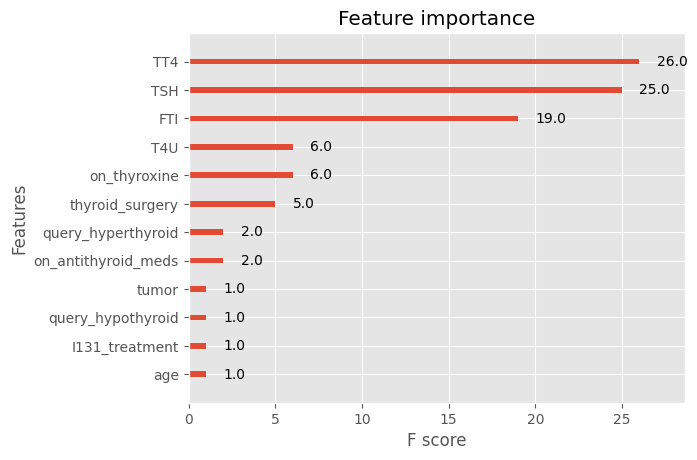

In [142]:
from xgboost import plot_importance

xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)

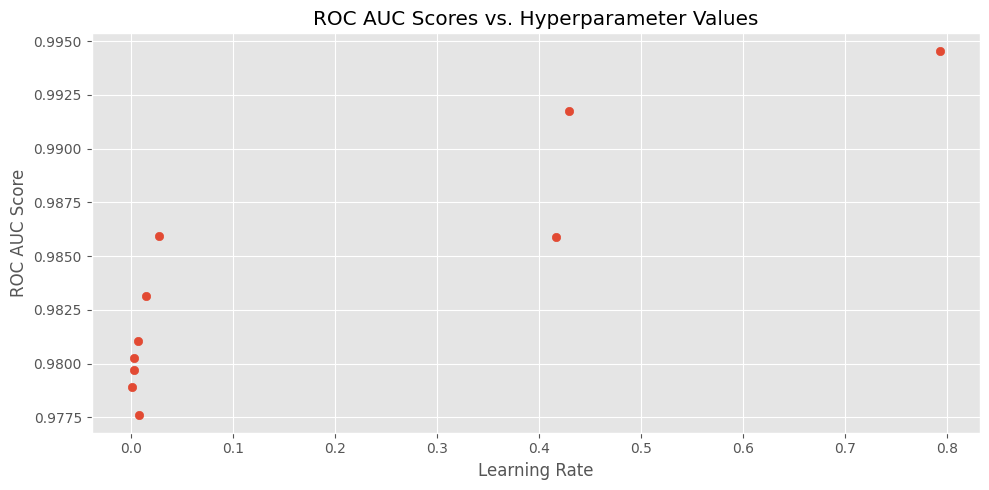

In [157]:
results = opt.cv_results_
scores = results['mean_test_score']
params = [results['params'][:][i]['clf__learning_rate'] for i in range (len(results['params'])) ]#results['params']

# Plot the scores against hyperparameter values
plt.figure(figsize=(10, 5))
plt.scatter(params, scores)
#plt.xticks(range(len(scores)), [str(p) for p in params], rotation=45)
plt.xlabel("Learning Rate")
plt.ylabel("ROC AUC Score")
plt.title("ROC AUC Scores vs. Hyperparameter Values")
plt.tight_layout()
plt.show()

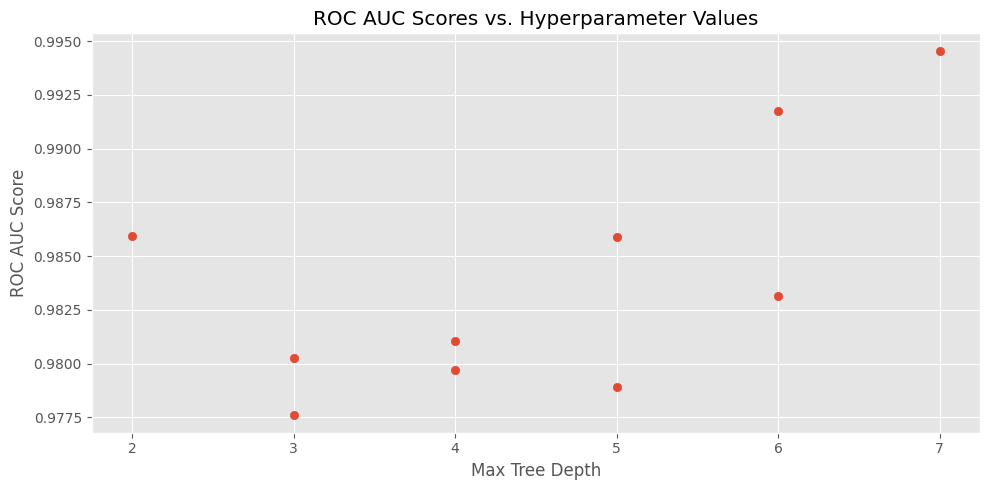

In [158]:
results = opt.cv_results_
scores = results['mean_test_score']
params = [results['params'][:][i]['clf__max_depth'] for i in range (len(results['params'])) ]#results['params']

# Plot the scores against hyperparameter values
plt.figure(figsize=(10, 5))
plt.scatter(params, scores)
#plt.xticks(range(len(scores)), [str(p) for p in params], rotation=45)
plt.xlabel("Max Tree Depth")
plt.ylabel("ROC AUC Score")
plt.title("ROC AUC Scores vs. Hyperparameter Values")
plt.tight_layout()
plt.show()

In [147]:
results

{'mean_fit_time': array([0.2582581 , 0.23437047, 0.23039778, 0.51994483, 0.52972984,
        0.21176926, 0.31796559, 0.34053222, 1.25097783, 0.56148783]),
 'std_fit_time': array([0.00321227, 0.00394993, 0.01762579, 0.00695349, 0.0268737 ,
        0.00723807, 0.007864  , 0.00800096, 0.66412599, 0.01521192]),
 'mean_score_time': array([0.01292515, 0.01160812, 0.01050989, 0.0119679 , 0.01018039,
        0.01066923, 0.01086911, 0.01120615, 0.01910615, 0.00992751]),
 'std_score_time': array([3.38059657e-03, 1.56526745e-03, 1.42287006e-04, 2.33017957e-03,
        9.80238368e-05, 1.64296525e-04, 4.80089750e-05, 5.06022452e-04,
        1.04008659e-02, 1.95655628e-04]),
 'param_clf__colsample_bylevel': masked_array(data=[0.5331080642783614, 0.7098720980049984,
                    0.6301181140809947, 0.7750018497221565,
                    0.9425384185492701, 0.5056087634867006,
                    0.935225370284509, 0.8255063664935096,
                    0.7160044460033754, 0.6854728136721551]

In [155]:
[results['params'][:][i]['clf__learning_rate'] for i in range (len(results['params'])) ]

[0.0011002938624638172,
 0.002566198468819385,
 0.0031574039841631043,
 0.4299244814327041,
 0.7929828265552742,
 0.00770902165228149,
 0.014685268484248162,
 0.02796171154881776,
 0.006917774244564682,
 0.4165635668761467]

In [154]:
len(results['params'])

10

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [161]:
cm = confusion_matrix(y_test, y_pred)

In [162]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  26    0   13]
 [   0  108    0]
 [   3    6 1093]]


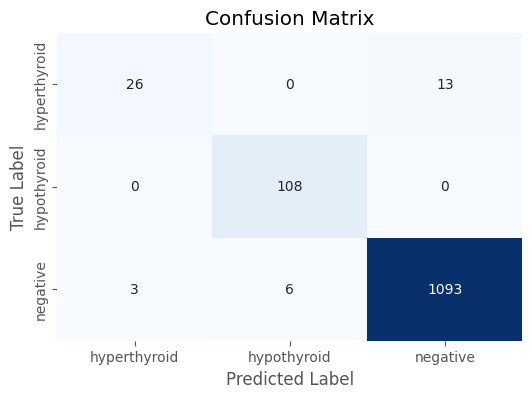

In [181]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#hypothyroid = 1
# negative =2
#hyperthyroid=0


In [165]:
decoded_labels = label_encoder.inverse_transform(df['target_coded'])

In [166]:
decoded_labels

array(['hypothyroid', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [170]:
label_encoder.classes_

array(['hyperthyroid', 'hypothyroid', 'negative'], dtype=object)